In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import pandas as pd
from astropy.convolution import convolve, Box2DKernel
import matplotlib
from matplotlib import cm

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
#
# TO DO:
# - combine flats for each system
# - process all 4 targets (2 systems)
#     - find photocenter in each image
#     - center & stack images 
#     ~ pull WCS to find scale, draw reference bars/coordinates
#

In [4]:
flat1_lis = pd.read_table('flat1.lis', names=['file'], delim_whitespace=True)
s1_lis = pd.read_table('kic7871442.lis', names=['file'], delim_whitespace=True)
s2_lis = pd.read_table('kic7871438.lis', names=['file'], delim_whitespace=True)

flat2_lis = pd.read_table('flat2.lis', names=['file'], delim_whitespace=True)
s3_lis = pd.read_table('kic10536761.lis', names=['file'], delim_whitespace=True)
s4_lis = pd.read_table('kic8888573.lis', names=['file'], delim_whitespace=True)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in sqrt


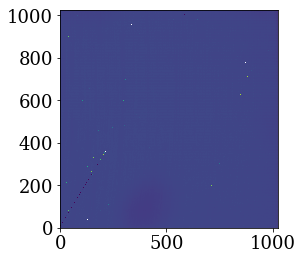

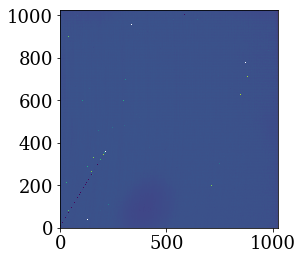

In [8]:
flat1 = np.zeros((1024,1024,len(flat1_lis)))
for k in range(len(flat1_lis)):
    hdu = fits.open(flat1_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data
    
    flat1[:,:,k] = img / np.nanmedian(img)
    hdu.close()
    
flat2 = np.zeros((1024,1024,len(flat2_lis)))
for k in range(len(flat2_lis)):
    hdu = fits.open(flat2_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data
    
    flat2[:,:,k] = img / np.nanmedian(img)
    hdu.close()
    
flat1 = np.nanmedian(flat1, axis=2)
flat2 = np.nanmedian(flat2, axis=2)

plt.figure(figsize=(4,4))
plt.imshow((flat1**0.5), origin='lower')

plt.figure(figsize=(4,4))
plt.imshow((flat2**0.5), origin='lower')

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in sqrt


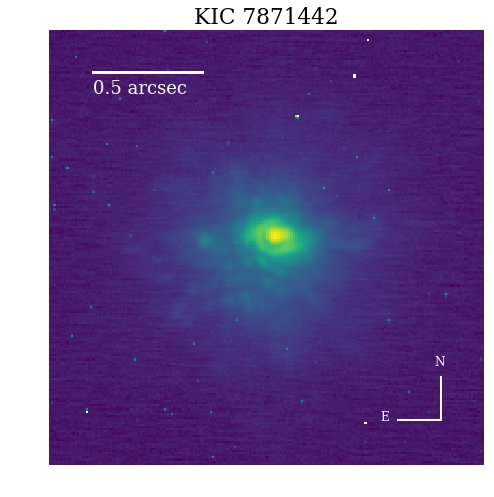

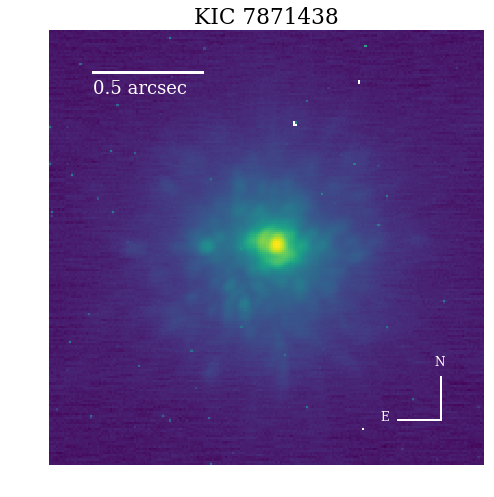

In [26]:
sys1 = np.zeros((200, 200, len(s1_lis)))
sys2 = np.zeros((200, 200, len(s2_lis)))

xy1 = [[580, 448], [323, 695], [833, 193], [831, 698]]
xy2 = [[324, 698], [834, 196], [829, 701]]

for k in range(len(s1_lis)):
    hdu = fits.open(s1_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data / flat1
    sys1[:,:,k] = img[xy1[k][1]-100:xy1[k][1]+100, xy1[k][0]-100:xy1[k][0]+100]
    hdu.close()

for k in range(len(s2_lis)):
    hdu = fits.open(s2_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data / flat1
    sys2[:,:,k] = img[xy2[k][1]-100:xy2[k][1]+100, xy2[k][0]-100:xy2[k][0]+100]
    hdu.close()
    
kic7871442 = np.nanmean(sys1, axis=2)
kic7871438 = np.nanmean(sys2, axis=2)

plt.figure(figsize=(8,8))
plt.imshow((np.log10(kic7871442**0.5)), origin='lower')
plt.plot([20,70], [180,180], c='white', lw=3)
plt.text(20, 170, '0.5 arcsec', color='white')
plt.plot([180,180],[20,40], c='white', lw=2)
plt.plot([160,180],[20,20], c='white', lw=2)
plt.text(177, 45, 'N', fontsize=12, color='white')
plt.text(152, 20, 'E', fontsize=12, color='white')

plt.title('KIC 7871442')
plt.axis('off')
plt.savefig('kic7871442_AO.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)


plt.figure(figsize=(8,8))
plt.imshow((np.log10(kic7871438**0.5)), origin='lower')
plt.plot([20,70], [180,180], c='white', lw=3)
plt.text(20, 170, '0.5 arcsec', color='white')
plt.plot([180,180],[20,40], c='white', lw=2)
plt.plot([160,180],[20,20], c='white', lw=2)
plt.text(177, 45, 'N', fontsize=12, color='white')
plt.text(152, 20, 'E', fontsize=12, color='white')

plt.title('KIC 7871438')
plt.axis('off')
plt.savefig('kic7871438_AO.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in sqrt


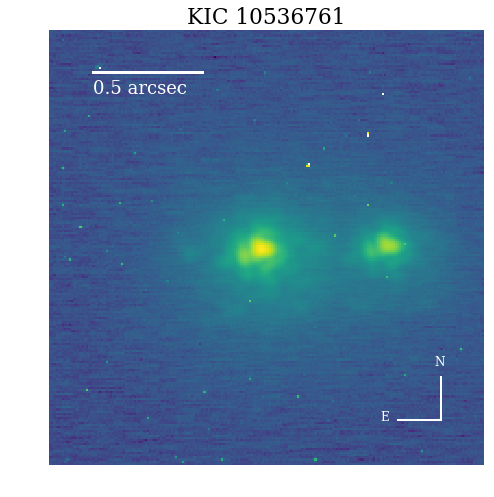

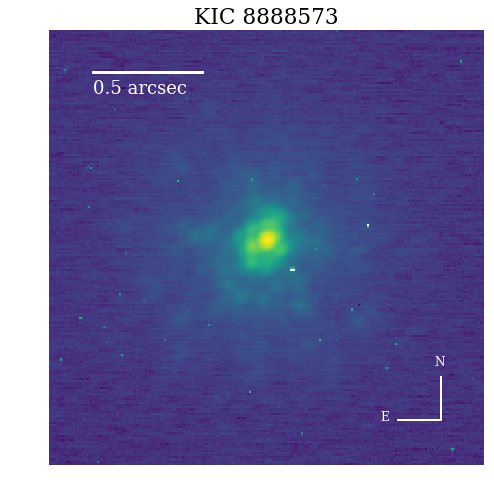

In [27]:
sys3 = np.zeros((200, 200, len(s3_lis)))
sys4 = np.zeros((200, 200, len(s4_lis)))

# replace this manual centroiding with a 2d gaussian fit...
xy3 = [[559, 519], [574, 490], [569, 468], [318, 717], [826, 218], [825, 725]]
xy4 = [[575, 517], [325, 765], [830, 264], [825, 767]]

for k in range(len(s3_lis)):
    hdu = fits.open(s3_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data / flat2
    sys3[:,:,k] = img[xy3[k][1]-100:xy3[k][1]+100, xy3[k][0]-100:xy3[k][0]+100]
    hdu.close()

for k in range(len(s4_lis)):
    hdu = fits.open(s4_lis['file'].values[k], ignore_missing_end=True)
    img = hdu[0].data / flat2
    sys4[:,:,k] = img[xy4[k][1]-100:xy4[k][1]+100, xy4[k][0]-100:xy4[k][0]+100]
    hdu.close()
    
kic10536761 = np.nanmean(sys3, axis=2)
kic8888573 = np.nanmean(sys4, axis=2)

plt.figure(figsize=(8,8))
plt.imshow((np.log10(kic10536761**0.5)), origin='lower')#, cmap=cm.gray_r)
plt.title('KIC 10536761')
plt.plot([20,70], [180,180], c='white', lw=3)
plt.text(20, 170, '0.5 arcsec', color='white')
plt.plot([180,180],[20,40], c='white', lw=2)
plt.plot([160,180],[20,20], c='white', lw=2)
plt.text(177, 45, 'N', fontsize=12, color='white')
plt.text(152, 20, 'E', fontsize=12, color='white')

plt.axis('off')
plt.savefig('kic10536761_AO.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)


plt.figure(figsize=(8,8))
plt.imshow((np.log10(kic8888573**0.5)), origin='lower')
plt.title('KIC 8888573')
plt.plot([20,70], [180,180], c='white', lw=3)
plt.text(20, 170, '0.5 arcsec', color='white')
plt.plot([180,180],[20,40], c='white', lw=2)
plt.plot([160,180],[20,20], c='white', lw=2)
plt.text(177, 45, 'N', fontsize=12, color='white')
plt.text(152, 20, 'E', fontsize=12, color='white')

plt.axis('off')
plt.savefig('kic8888573_AO.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)


In [45]:
# VERY rough flux estimates
# sum up the counts in 2 equal sized boxes around the sources
flux1 = np.nansum(kic10536761[80:120,80:120])
flux2 = np.nansum(kic10536761[80:120,140:180])

print( -2.5 * np.log10(flux2/flux1)) # mag fainter

0.782816911851
